# Euler's Method for a System of Equations

One of the simplest models for how a quantity changes with time is a first order ODE like this one for a temperature sensor.

\begin{equation}
\frac{dT_m}{dt}=\dot{T}_m = \frac{(T-T_m)}{\tau}
\end{equation}

We can predict the new temperature $T_m(new)$ based on the old and march the solution forward by Euler's method.

\begin{equation}
T_m(new) = T_m(old) + \Delta T_m = T_m(old) + \frac{(T-T_m)}{\tau} {\Delta t} 
\end{equation}



In [2]:
# gets all of numpy but you will still need to refer to e.g. numpy.random.randn() as random.randn()
from numpy import *               # all of the array capable elements for numerical data          
from scipy.stats import norm      # comprehensive functions for Gaussian normal distributions
import csv                        # library for reading and writing comma separated value files
from matplotlib.pyplot import *   # all of pyplot to graph the results of our calculations

# put figures inline in the notebook, so you don't have to call show()
%matplotlib inline

# This lets you make the default figure size larger (or smaller)
from IPython.core.pylabtools import figsize
figsize(14, 7)

<a href="http://www.youtube.com/watch?feature=player_embedded&v=-bEeVGgU-PI
" target="_blank"><img src="http://img.youtube.com/vi/-bEeVGgU-PI/0.jpg" 
alt="IMAGE ALT TEXT HERE" width="480" height="360" border="10" /></a>
## Simplify a second order equation to a system of first order
We can do the same thing for higher order equations by reducing them to a system of first order equations, then solving the system. The position of the end of the ruler could be described by a second order equation derived from a force balance 

\begin{equation}
{\rm Acceleration = \frac{Force}{Mass}}\quad\quad\quad
\ddot y = F - K y - C \dot y
\end{equation}

the acceleration depends on the externally applied force per unit mass $F$, the internal force per unit mass of the stiffness $K$, all slowed down by some friction that depends on how fast the ruler is moving. Introduce another equation saying that the velocity is the derivative of the position

\begin{equation}
v = \dot y
\end{equation}
and now we can express that single, second order equation in one variable, $y$, as a system of two first order equations in two variables, $y$ and $v$
\begin{equation}
\dot v = F - K y - C v
\end{equation}
\begin{equation}
\dot y = v
\end{equation}

## Solve the system with Euler
For now let's take $K$ and $C$ as constants, and $F=0$, so we still need to know initial conditions for $y$ and $v$. Start out by making $v = 0$ and $y = -0.05$m, when we suddenly release the ruler. We would need a detailed model to get $K$ and $C$, or we could measure them, or just guess them to get performance that looks like the video.

**Set up the intial conditions**, a time base $t$, and define how the ambient temperature will change with time. Make sure everything is defined at time $t=0$, including the time constant.

In [3]:
n = 10000             # the number of steps
t = linspace(0,10,n)  # the time base
a = zeros(n)          # acceleration, the second derivative
v = zeros(n)          # velocity, the first derivative
y = zeros(n)          # position, the underlying variable
F = zeros(n)          # the external force from the finger
v[0] = 0
y[0] = -0.05
K = 1000
C = 3
deltat = t[1]-t[0]

**Go one time step into the future** using the values at the old time, then **do it again**. Notice that the ruler doesn't start to move until time step two, which would be a problem unless we make the time steps really small.

In [4]:
dydt = v[0]
a[0] = F[0] - K*y[0] - C*v[0]
dvdt = a[0]
y[1] = y[0] + dydt * deltat
v[1] = v[0] + dvdt * deltat
print(y[1],v[1])

-0.05 0.05000500050005


In [5]:
dydt = v[1]
a[1] = F[1] - K*y[1] - C*v[1]
dvdt = a[1]
y[2] = y[1] + dydt * deltat
v[2] = v[1] + dvdt * deltat
print(y[2],v[2])

-0.049949989998499804 0.0998599709955994


Now take all the rest of the steps

In [6]:
for i in range(2,n-1):
    a[i] = F[i] - K*y[i] - C*v[i]
    y[i+1] = y[i] + v[i] * deltat
    v[i+1] = v[i] + a[i] * deltat

Run this plot any time to check on the progress of the solution after each step. Define the plot as a function so it is easy to call later.

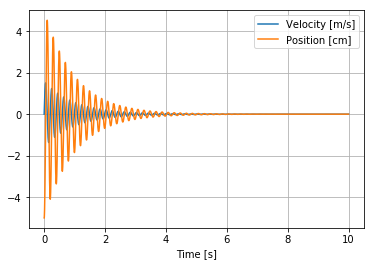

In [7]:
def showSolution():
    plot(t,v,label="Velocity [m/s]")
    plot(t,y*100,label = 'Position [cm]')
    grid()
    legend()
    xlabel("Time [s]")

showSolution()

This follows the decaying sinusoid you saw in the video and would expect from the analytical solutions you get in your differential equations class. 
## Solve a more complicated situation
Now try adding a time varying force (a bump) to the system and you get something you can't do easily with an analytical solution. If this was a car suspension we might want to actively change the damping based on what was happening in the motion, so we'll add that capability in the function cActive().

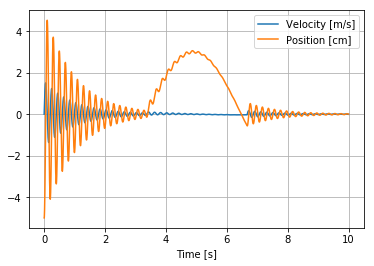

In [8]:
# Add a bump in the middle of the time period
# Could be a single chicken stride...
F[int(n/3):int(2*n/3)] = 30*sin(t[:int(n/3)])

def cActive(y,v):  # This function could change the suspension damping based on y and v
    return C       # But for now it just keeps on returning a constant

def runSolution():
    global K,C     # Use the values defined externally
    # set the intial conditions
    v[0] = 0
    y[0] = -0.05
    K = 1000
    C = 3
    deltat = t[1]-t[0]
    
    for i in range(0,n-1):  # for the full range of values
        # determine the current values for force, damping and acceleration
        a[i] = F[i] - K*y[i] - cActive(y[i],v[i])*v[i]
        # predict the new values of 
        y[i+1] = y[i] + v[i] * deltat
        v[i+1] = v[i] + a[i] * deltat

runSolution()        
showSolution()

Now let's build in some active damping to slow things down. Play with the values to see the effects

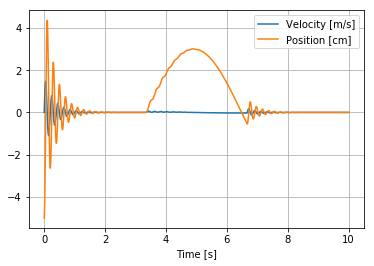

In [9]:
def cActive(y,v):  # This time C won't be a constant
    c = C
    # add more damping if we get out of the normal range
    if(abs(y) > 0.02): c = c + .5*C
    # add more damping on the rebound
    if(v < 0): c = c + 2.5*C
    return c
runSolution()
showSolution()